In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features
from cartopy.util import add_cyclic_point


In [ ]:
# Load the dataset on Chinook escapement time series published in this study  https://doi.org/10.1111/faf.12750
esc_data = pd.read_csv('data/CK_esc_FINAL.csv')

In [7]:
print(esc_data.head())

  population  pop_no     cons_unit  group_1 run_time       juv_lh  year  \
0   harrison       1  lower_fraser      1.0     fall  ocean_early  1979   
1   harrison       1  lower_fraser      1.0     fall  ocean_early  1980   
2   harrison       1  lower_fraser      1.0     fall  ocean_early  1981   
3   harrison       1  lower_fraser      1.0     fall  ocean_early  1982   
4   harrison       1  lower_fraser      1.0     fall  ocean_early  1983   

    w_spawn  h_spawn  tot_spawn     method  quality  
0   78000.0      0.0    78000.0  peak_live  med_low  
1   52000.0      0.0    52000.0  peak_live  med_low  
2  104000.0      0.0   104000.0  peak_live  med_low  
3  114400.0      0.0   114400.0  peak_live  med_low  
4   31200.0      0.0    31200.0  peak_live  med_low  


In [8]:
#Filter for Nicola population
nicola_esc = esc_data[esc_data['population'] == 'nicola']

In [10]:
#Read Climatic Data

#For temperature: Hottest day

hottest_day = xr.open_dataset('data/hottest_day.nc')

print(hottest_day)

<xarray.Dataset> Size: 132kB
Dimensions:            (region: 18, time: 151)
Coordinates:
    lat                (region) float64 144B ...
    lon                (region) float64 144B ...
  * time               (time) datetime64[ns] 1kB 1950-01-01 ... 2100-01-01
Dimensions without coordinates: region
Data variables:
    ssp126_tx_max_p10  (region, time) float32 11kB ...
    ssp126_tx_max_p50  (region, time) float32 11kB ...
    ssp126_tx_max_p90  (region, time) float32 11kB ...
    ssp245_tx_max_p10  (region, time) float32 11kB ...
    ssp245_tx_max_p50  (region, time) float32 11kB ...
    ssp245_tx_max_p90  (region, time) float32 11kB ...
    ssp585_tx_max_p10  (region, time) float32 11kB ...
    ssp585_tx_max_p50  (region, time) float32 11kB ...
    ssp585_tx_max_p90  (region, time) float32 11kB ...
    ssp370_tx_max_p10  (region, time) float32 11kB ...
    ssp370_tx_max_p50  (region, time) float32 11kB ...
    ssp370_tx_max_p90  (region, time) float32 11kB ...
Attributes: (12/46)
   

In [12]:
#For evotranspiration: SPEI

spei = xr.open_dataset('data/spei_3.nc')

print(spei)

<xarray.Dataset> Size: 88kB
Dimensions:         (region: 8, time: 151)
Coordinates:
    scale           int32 4B ...
    lat             (region) float64 64B ...
    lon             (region) float64 64B ...
  * time            (time) datetime64[ns] 1kB 1950-07-15 ... 2100-07-15
Dimensions without coordinates: region
Data variables:
    rcp26_spei_p10  (region, time) float64 10kB ...
    rcp26_spei_p50  (region, time) float64 10kB ...
    rcp26_spei_p90  (region, time) float64 10kB ...
    rcp45_spei_p10  (region, time) float64 10kB ...
    rcp45_spei_p50  (region, time) float64 10kB ...
    rcp45_spei_p90  (region, time) float64 10kB ...
    rcp85_spei_p10  (region, time) float64 10kB ...
    rcp85_spei_p50  (region, time) float64 10kB ...
    rcp85_spei_p90  (region, time) float64 10kB ...
Attributes: (12/31)
    Climpact2_data_created_on:  Mon Nov 21 08:22:29 PST 2016
    Climpact2_version:          1.1.4
    Climpact2_R_version:        3.0.2
    Climpact2_base_period:      1950-2005

In [14]:
#For precipitation: wet days

wet_days = xr.open_dataset('data/wetdays_50_138_121_775_ssp245_ssp585.nc')

print(wet_days.time)

<xarray.DataArray 'time' (time: 31)> Size: 248B
array(['2040-01-01T00:00:00.000000000', '2041-01-01T00:00:00.000000000',
       '2042-01-01T00:00:00.000000000', '2043-01-01T00:00:00.000000000',
       '2044-01-01T00:00:00.000000000', '2045-01-01T00:00:00.000000000',
       '2046-01-01T00:00:00.000000000', '2047-01-01T00:00:00.000000000',
       '2048-01-01T00:00:00.000000000', '2049-01-01T00:00:00.000000000',
       '2050-01-01T00:00:00.000000000', '2051-01-01T00:00:00.000000000',
       '2052-01-01T00:00:00.000000000', '2053-01-01T00:00:00.000000000',
       '2054-01-01T00:00:00.000000000', '2055-01-01T00:00:00.000000000',
       '2056-01-01T00:00:00.000000000', '2057-01-01T00:00:00.000000000',
       '2058-01-01T00:00:00.000000000', '2059-01-01T00:00:00.000000000',
       '2060-01-01T00:00:00.000000000', '2061-01-01T00:00:00.000000000',
       '2062-01-01T00:00:00.000000000', '2063-01-01T00:00:00.000000000',
       '2064-01-01T00:00:00.000000000', '2065-01-01T00:00:00.000000000',
   

C:\Users\jclabarcena\AppData\Local\Temp\ipykernel_40280\723731015.py:3: FutureWarning: In a future version, xarray will not decode the variable 'wetdays_p50' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  wet_days = xr.open_dataset('data/wetdays_50_138_121_775_ssp245_ssp585.nc')


In [15]:
#It seems that wet days has only future predictions from 2040 to 2070. I will not use it for the model. I will use the other two variables only.

#Selecting the emission scenario ssp5-8.5 (RCP8.5) for both temperature and SPEI

ssp585_tx_max_p50 = hottest_day['ssp585_tx_max_p50']
rcp585_spei = spei['rcp85_spei_p50']

In [ ]:
#After having all the climatic indices, I explored options for the spatial component. I have a 18 grids object for the climatic indices, but decided to get the mean over all the cells. That means, one value of the variable for each year and ssp value for the study region.
#I am reducing the spatial component because the salmon escapement data is for the whole Nicola river population, so it does not have spatial resolution.

#In this line, I collapse the spatial grid (lon × lat) into a single average value per scenario and time. The conveting to dataframe will be done later.
tx_max_p50_mean = ssp585_tx_max_p50.mean(dim="region")
spei_p50_mean = rcp585_spei.mean(dim="region")

In [24]:
df_tx_max = tx_max_p50_mean.to_dataframe(name="tx_max").reset_index()
df_spei = spei_p50_mean.to_dataframe(name="spei").reset_index()
print(df_tx_max.head())
print(df_spei.head())

        time     tx_max
0 1950-01-01  26.675480
1 1951-01-01  27.228365
2 1952-01-01  26.963282
3 1953-01-01  27.362644
4 1954-01-01  27.571693
        time  scale      spei
0 1950-07-15      2 -0.405723
1 1951-07-15      2  0.037564
2 1952-07-15      2 -0.023910
3 1953-07-15      2 -0.091647
4 1954-07-15      2  0.026060


In [26]:
#Creating a year column to merge with escapement data
# For tx_max_p50_mean and spei_p50_mean, add a 'year' coordinate if 'time' is datetime64

df_tx_max['year'] = pd.to_datetime(df_tx_max['time']).dt.year
df_spei['year'] = pd.to_datetime(df_spei['time']).dt.year

In [30]:
#Now select the hsitorical period from 1980 to 2019 for both variables to match the escapement data period.

#Get the years present in the escapement data
esc_years = nicola_esc['year'].values

#Subset the climate variables to only those years
# Subset the climate variables to only those years using boolean indexing
tx_max_p50_hist = df_tx_max[df_tx_max['year'].isin(esc_years)]
spei_p50_hist = df_spei[df_spei['year'].isin(esc_years)]

In [31]:
# Merge the historical climate and escapement data by year
merged_df = pd.merge(nicola_esc, tx_max_p50_hist[['year', 'tx_max']], on='year', how='inner')
merged_df = pd.merge(merged_df, spei_p50_hist[['year', 'spei']], on='year', how='inner')
print(merged_df.head())

  population  pop_no       cons_unit  group_1 run_time  juv_lh  year  w_spawn  \
0     nicola       3  lower_thompson      1.0   spring  stream  1979   3017.0   
1     nicola       3  lower_thompson      1.0   spring  stream  1980   6180.0   
2     nicola       3  lower_thompson      1.0   spring  stream  1981   3258.0   
3     nicola       3  lower_thompson      1.0   spring  stream  1982   4737.0   
4     nicola       3  lower_thompson      1.0   spring  stream  1983   2407.0   

   h_spawn  tot_spawn              method  quality     tx_max      spei  
0      0.0     3017.0  run_reconstruction  med_low  26.656578 -0.223578  
1      0.0     6180.0  run_reconstruction  med_low  26.533485  0.022832  
2      0.0     3258.0  run_reconstruction  med_low  26.677853  0.010921  
3      0.0     4737.0  run_reconstruction  med_low  27.858223  0.204930  
4      0.0     2407.0  run_reconstruction  med_low  26.108522  0.457843  


In [32]:
#Ready for statistical analysis and modeling

target_col = "tot_spawn"
feature_cols = ["tx_max", "spei"]

data_model = merged_df[[target_col] + feature_cols].copy()

print(data_model.head())
print(data_model[feature_cols].isna().sum())

   tot_spawn     tx_max      spei
0     3017.0  26.656578 -0.223578
1     6180.0  26.533485  0.022832
2     3258.0  26.677853  0.010921
3     4737.0  27.858223  0.204930
4     2407.0  26.108522  0.457843
tx_max    0
spei      0
dtype: int64


In [ ]:
#For time series with Random Forest, you must split chronologically (past for training, future for testing) to prevent data leakage
data_model = data_model.sort_index()

X = data_model[["tx_max", "spei"]].values
y = data_model["tot_spawn"].values

n = len(data_model)          #
split_idx = int(n * 0.8)     # 80% train, 20% test

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(X_train.shape, X_test.shape)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forest = RandomForestRegressor(
    n_estimators=300,
    random_state=0,
    n_jobs=-1
)

forest.fit(X_train, y_train)
X_train_preds = forest.predict(X_train)
X_test_preds  = forest.predict(X_test)

(32, 2) (9, 2)


In [53]:
#Meauring model performance
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(np.sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

test mse: 34178322.425567895
test rmse: 5846.222919592435
test r2: -9.798151152544238


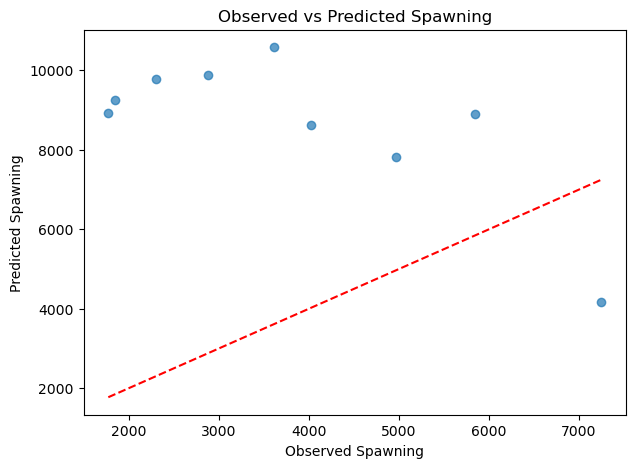

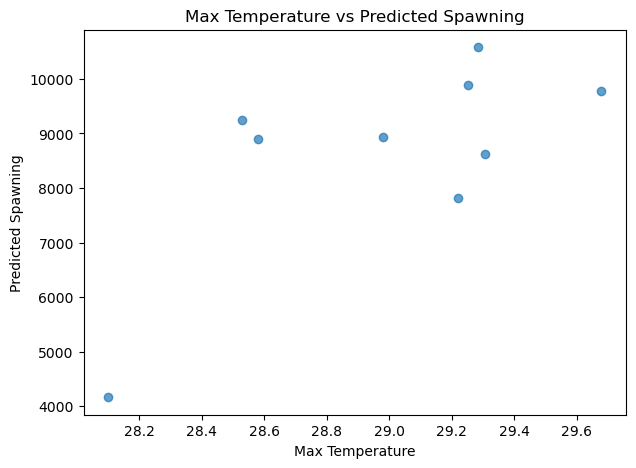

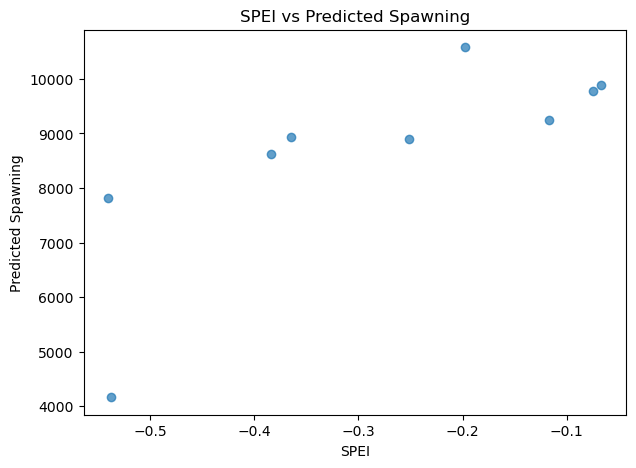

In [54]:
# Plotting relationships between variables and predicted spawning
import matplotlib.pyplot as plt

# Add predictions to the test set for plotting
results_df = data_model.iloc[split_idx:].copy()
results_df['predicted_spawn'] = X_test_preds

# Plot observed vs predicted spawning
plt.figure(figsize=(7,5))
plt.scatter(results_df['tot_spawn'], results_df['predicted_spawn'], alpha=0.7)
plt.xlabel('Observed Spawning')
plt.ylabel('Predicted Spawning')
plt.title('Observed vs Predicted Spawning')
plt.plot([results_df['tot_spawn'].min(), results_df['tot_spawn'].max()],
         [results_df['tot_spawn'].min(), results_df['tot_spawn'].max()], 'r--')
plt.show()

# Plot relationship between tx_max and predicted spawning
plt.figure(figsize=(7,5))
plt.scatter(results_df['tx_max'], results_df['predicted_spawn'], alpha=0.7)
plt.xlabel('Max Temperature')
plt.ylabel('Predicted Spawning')
plt.title('Max Temperature vs Predicted Spawning')
plt.show()

# Plot relationship between spei and predicted spawning
plt.figure(figsize=(7,5))
plt.scatter(results_df['spei'], results_df['predicted_spawn'], alpha=0.7)
plt.xlabel('SPEI')
plt.ylabel('Predicted Spawning')
plt.title('SPEI vs Predicted Spawning')
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=0, n_jobs=-1),
                           param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
forest = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}


In [ ]:
#The model has severe limitations, starting by the limited amount of feature data used for training. It will requiere more features to improve its performance. Also, some hyperparameter tuning could be done to improve the model. I tried increasing the number of estimators to 500 but it did not improve much the performance.

   year     tx_max      spei
0  2020  28.600748 -0.769873
1  2021  29.213650  0.154059
2  2022  29.319527 -0.329737
3  2023  28.780464 -0.456312
4  2024  28.716885 -0.268612


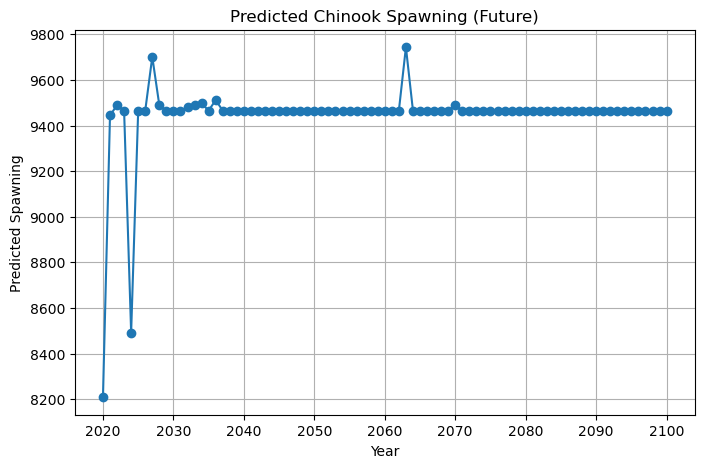

   year     tx_max      spei  predicted_spawn
0  2020  28.600748 -0.769873      8208.398312
1  2021  29.213650  0.154059      9444.795300
2  2022  29.319527 -0.329737      9489.178013
3  2023  28.780464 -0.456312      9465.547159
4  2024  28.716885 -0.268612      8492.287999


In [60]:
#Predict future spawning using future climate projections ---
#I have tx_max_p50_mean and spei_p50_mean for all years, including future.
#I'll use years beyond the historical period (e.g., >2019) for prediction

future_tx_max = df_tx_max[df_tx_max['year'] > 2019]
future_spei = df_spei[df_spei['year'] > 2019]

# Merge future climate data
future_climate = pd.merge(future_tx_max[['year', 'tx_max']], future_spei[['year', 'spei']], on='year', how='inner')

print(future_climate.head())


# Predict future spawning
future_X = future_climate[['tx_max', 'spei']].values
future_climate['predicted_spawn'] = forest.predict(future_X)

# Plot predicted future spawning
plt.figure(figsize=(8,5))
plt.plot(future_climate['year'], future_climate['predicted_spawn'], marker='o')
plt.xlabel('Year')
plt.ylabel('Predicted Spawning')
plt.title('Predicted Chinook Spawning (Future)')
plt.grid(True)
plt.show()

print(future_climate[['year', 'tx_max', 'spei', 'predicted_spawn']].head())